# Aula 3: A Natureza espacial do dado

> A grande maioria dos dados para urbanismo tem uma natureza espacial

## O que é o espaço?

* Tema em aberto para a Geografia _https://www.revistas.usp.br/geousp/article/download/74066/77708/0_
* Tema em aberto para Física

## Qual a forma da Terra?


* Indicação de documentário: https://www.netflix.com/title/81015076

_https://www.g-red.eu/geoid/geoidViewer.html_

## Por que medimos a Terra?

* Geo (Terra) + metria (medida)
* Terrenos ao redor do Nilo
* Cobrar imposto
* Isso lembra alguma coisa? LiDAR 3D na próxima aula
* Assunto interessante: Terra, agrigultura, propriedade, herança e patriarcado.
* Origem das palavras estatística e Cadastro


## Mas não é apenas sobre cobrar imposto

* Livro: O Mapa Fantasma: Como a luta de dois homens contra o cólera mudou o destino de nossas
metrópoles (2008)
* _https://www.amazon.com.br/mapa-fantasma-homens-destino-metr%C3%B3poles/dp/8537800554_ 

> ALERTA DE SPOILER - Contexto histórico: Higienismo, Positivismo, Eugenia


## APenas uma curiosidade

_https://en.wikipedia.org/wiki/The_Blue_Marble#/media/File:The_Earth_seen_from_Apollo_17.jpg_
    
* Primeira (_na verdade não foi a primeira, mas a que ficou mais conhecida_) imagem colorida da Terra inteira vista do céu, Blue Marble, 1972
* Será que influenciou a forma como vemos a Terra?

_https://en.wikipedia.org/wiki/Timeline_of_first_images_of_Earth_from_space_


## Mudanças morfológicas por imagens de satélites

* Ferramenta espaço-temporal
* Lançada pelo Google em Abril/2021
* [Evolução da mancha urbana na cidade de São Paulo](https://earth.google.com/web/@-23.60975113,-46.39533399,884.84314066a,127494.03319582d,35y,1.75213638h,38.40559901t,0r/data=CjISMBIgNTQ0MGExNzMxYzI1MTFlYTk0NDM4YmI2ODk0NDUyOTciDG1haW5Ob1JhbmRvbQ)


## Projeções cartográficas

> São técnicas para projetar a superfície da Terra, admitida como esférica ou elipsoidal, em um plano

* Esferas, elipsoides e geóides não são superfícies desenvolvíveis (_https://en.wikipedia.org/wiki/Developable_surface_)
* Algumas propriedades do modelo são preservadas:
    * forma, direção, área, distância, rota mais curta

https://www.geogebra.org/m/btfr5zww

_https://en.wikipedia.org/wiki/Map_projection_

## UTM

* Universal Transversa de Mercator
* Projeção Cilíndrica com o Eixo no Plano do Equador
* Minimiza todas as perdas
* Importância: Sistema de coordenadas ortogonal
* https://www.geogebra.org/m/ttv5emkh
* Aula Sistema UTM _https://edisciplinas.usp.br/pluginfile.php/4530334/mod_resource/content/10/PTR5003%20-%20Proje%C3%A7%C3%A3o%20UTM%20v2019.pdf?fbclid=IwAR3sIMz8GLIWCDjz16rU4aee3Zai6sfQQTL4G-rEYPodGhmaCgSQrcLPQ-I_

## Mais material online

* https://projections.mgis.psu.edu/
* https://projectionwizard.org/



## Anamorfose cartográfica

> Todo mapa é político

_https://educa.ibge.gov.br/professores/educa-recursos/20815-anamorfose.html_

## Vamos praticar?

* Que tal espacializar os acidentes INFOSIGA?

In [27]:
import pandas as pd

In [28]:
df_acidentes = pd.read_csv("dados/acidentes_naofatais.csv", encoding='cp1252', sep=";",  decimal=',')

In [29]:
df_acidentes.columns

Index(['ID', 'Data do Acidente', 'Dia do Acidente', 'Mês do Acidente',
       'Ano do Acidente', 'Ano/Mês do Acidente', 'Dia da Semana',
       'Hora do Acidente', 'Turno', 'Município', 'Batalhão de Trânsito',
       'Companhia de Trânsito', 'Região Administrativa', 'Logradouro',
       'Numero/KM', 'Jurisdição', 'Administração', 'Conservação', 'LAT_(GEO)',
       'LONG_(GEO)', 'Condições Climáticas', 'Iluminação', 'Mão de direção',
       'Obras na pista', 'Relevo', 'Superfície da via', 'Tipo de pavimento',
       'Tipo de pista', 'Traçado', 'Veículos Envolvidos - Bicicleta',
       'Veículos Envolvidos - Caminhão', 'Veículos Envolvidos - Automóvel',
       'Veículos Envolvidos - Motocicleta', 'Veículos Envolvidos - Ônibus',
       'Veículos Envolvidos - Pedestre', 'Pessoas Envolvidas - Grave',
       'Pessoas Envolvidas - Ileso', 'Pessoas Envolvidas - Leve',
       'Serviço de Atendimento - Bombeiro', 'Serviço de Atendimento - PMRV',
       'Serviço de Atendimento - PRF',
       'Ser

In [57]:
df_guarulhos = df_acidentes.loc[df_acidentes['Município'] == 'GUARULHOS', :]

In [58]:
import geopandas as gpd

In [59]:
df_guarulhos_loc = df_guarulhos[df_guarulhos['LAT_(GEO)'].notna() | df_guarulhos['LONG_(GEO)'].notna()]

In [60]:
gdf = gpd.GeoDataFrame(df_guarulhos_loc, geometry=gpd.points_from_xy(df_guarulhos_loc['LONG_(GEO)'], df_guarulhos_loc['LAT_(GEO)'], crs="EPSG:4326"))

In [64]:
gdf.geometry.to_file('resultados/guarulhos.gpkg', driver='GPKG')

<AxesSubplot:>

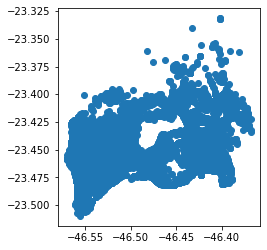

In [63]:
gdf.plot()